In [183]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_excel("hackathon_data_round2.xlsx")
predict=pd.read_csv('NewFile.csv')
Y=predict['Y']
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [128]:
print(data.shape)
data.head(20)

(225498, 20)


,Financial_Year,Branch_Code,Sequence_1,Sequence_2,Donation_type,Donor_Age,Donation_Date,Gender,Blood_Group_Code,Donor_Weight,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Donor_Blood_Pressure,Test_1,C1,Test_2,C2,Test_3,Test_4
0,14,BRC-01,345,1.0,R,24.00,01-JUL-13,M,5.0,56.0,37.0,72.0,13.0,120/80,0.121,N,0.224,N,R,N
1,14,BRC-01,346,2.0,R,33.00,01-JUL-13,M,3.0,75.0,37.0,72.0,13.0,120/80,0.122,N,0.222,N,N,N
2,14,BRC-01,347,3.0,R,28.00,01-JUL-13,M,5.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.221,N,N,N
3,14,BRC-01,348,4.0,R,20.00,01-JUL-13,M,3.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.242,N,N,N
4,14,BRC-01,349,5.0,T,22.00,01-JUL-13,M,7.0,75.0,37.0,72.0,13.0,120/80,0.124,N,0.243,N,N,N
5,14,BRC-01,350,6.0,T,20.00,01-JUL-13,M,2.0,75.0,37.0,72.0,13.0,120/80,0.121,N,0.244,N,N,N
6,14,BRC-01,351,7.0,T,23.57,01-JUL-13,M,1.0,75.0,37.0,72.0,13.0,120/80,0.242,N,0.191,N,N,N
7,14,BRC-01,352,8.0,R,35.00,01-JUL-13,M,1.0,85.0,37.0,72.0,13.0,120/80,0.241,N,0.193,N,N,N
8,14,BRC-01,353,9.0,T,23.00,01-JUL-13,M,3.0,56.0,37.0,72.0,13.0,120/80,0.244,N,0.192,N,N,N
9,14,BRC-01,354,10.0,T,22.00,01-JUL-13,M,1.0,60.0,37.0,72.0,13.0,120/80,0.213,N,0.203,N,N,N


In [184]:
data2 = data.copy()

In [185]:
dates = data["Donation_Date "]

# Make datetime in int

In [186]:
date = {'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC':12, 'JAN':1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY':5, 'JUN': 6 }

def datetime(dat):
    dmy = dat.split('-')
    dmy[1] = str(date[dmy[1]])
    dmy.insert(1, '-')
    dmy.insert(3, '-')
    dmy = "".join(dmy)
    return dmy

In [187]:
dat = []
for c in dates:
    if type(c) is str:
        dat.append(datetime(c))
    else:
        dat.append(None)
len(dat)

225498

In [188]:
data.head(1000)

,Financial_Year,Branch_Code,Sequence_1,Sequence_2,Donation_type,Donor_Age,Donation_Date,Gender,Blood_Group_Code,Donor_Weight,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Donor_Blood_Pressure,Test_1,C1,Test_2,C2,Test_3,Test_4
0,14,BRC-01,345,1.0,R,24.00,01-JUL-13,M,5.0,56.0,37.0,72.0,13.0,120/80,0.121,N,0.224,N,R,N
1,14,BRC-01,346,2.0,R,33.00,01-JUL-13,M,3.0,75.0,37.0,72.0,13.0,120/80,0.122,N,0.222,N,N,N
2,14,BRC-01,347,3.0,R,28.00,01-JUL-13,M,5.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.221,N,N,N
3,14,BRC-01,348,4.0,R,20.00,01-JUL-13,M,3.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.242,N,N,N
4,14,BRC-01,349,5.0,T,22.00,01-JUL-13,M,7.0,75.0,37.0,72.0,13.0,120/80,0.124,N,0.243,N,N,N
5,14,BRC-01,350,6.0,T,20.00,01-JUL-13,M,2.0,75.0,37.0,72.0,13.0,120/80,0.121,N,0.244,N,N,N
6,14,BRC-01,351,7.0,T,23.57,01-JUL-13,M,1.0,75.0,37.0,72.0,13.0,120/80,0.242,N,0.191,N,N,N
7,14,BRC-01,352,8.0,R,35.00,01-JUL-13,M,1.0,85.0,37.0,72.0,13.0,120/80,0.241,N,0.193,N,N,N
8,14,BRC-01,353,9.0,T,23.00,01-JUL-13,M,3.0,56.0,37.0,72.0,13.0,120/80,0.244,N,0.192,N,N,N
9,14,BRC-01,354,10.0,T,22.00,01-JUL-13,M,1.0,60.0,37.0,72.0,13.0,120/80,0.213,N,0.203,N,N,N


In [189]:
data.dropna(inplace=True)

In [190]:
# line plot of time series
from pandas import Series

In [191]:
NumberDates = pd.DataFrame({'NumberDate': dat})
data = data.join(NumberDates)

In [192]:
#data['NumberDate']=data['NumberDate'].str.replace('-',' ').apply(int)
data.head(20)

,Financial_Year,Branch_Code,Sequence_1,Sequence_2,Donation_type,Donor_Age,Donation_Date,Gender,Blood_Group_Code,Donor_Weight,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Donor_Blood_Pressure,Test_1,C1,Test_2,C2,Test_3,Test_4,NumberDate
0,14,BRC-01,345,1.0,R,24.00,01-JUL-13,M,5.0,56.0,37.0,72.0,13.0,120/80,0.121,N,0.224,N,R,N,01-7-13
1,14,BRC-01,346,2.0,R,33.00,01-JUL-13,M,3.0,75.0,37.0,72.0,13.0,120/80,0.122,N,0.222,N,N,N,01-7-13
2,14,BRC-01,347,3.0,R,28.00,01-JUL-13,M,5.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.221,N,N,N,01-7-13
3,14,BRC-01,348,4.0,R,20.00,01-JUL-13,M,3.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.242,N,N,N,01-7-13
4,14,BRC-01,349,5.0,T,22.00,01-JUL-13,M,7.0,75.0,37.0,72.0,13.0,120/80,0.124,N,0.243,N,N,N,01-7-13
5,14,BRC-01,350,6.0,T,20.00,01-JUL-13,M,2.0,75.0,37.0,72.0,13.0,120/80,0.121,N,0.244,N,N,N,01-7-13
6,14,BRC-01,351,7.0,T,23.57,01-JUL-13,M,1.0,75.0,37.0,72.0,13.0,120/80,0.242,N,0.191,N,N,N,01-7-13
7,14,BRC-01,352,8.0,R,35.00,01-JUL-13,M,1.0,85.0,37.0,72.0,13.0,120/80,0.241,N,0.193,N,N,N,01-7-13
8,14,BRC-01,353,9.0,T,23.00,01-JUL-13,M,3.0,56.0,37.0,72.0,13.0,120/80,0.244,N,0.192,N,N,N,01-7-13
9,14,BRC-01,354,10.0,T,22.00,01-JUL-13,M,1.0,60.0,37.0,72.0,13.0,120/80,0.213,N,0.203,N,N,N,01-7-13


In [193]:
#Convert datecol into datetimeme64

data['NumberDate'] = data['NumberDate'].astype('datetime64[ns]')


In [194]:
Tseries=data.sort_values('NumberDate')

# Dataenigeering Blood Pressure

In [195]:
def BloodPressure(blood):    
    '''
    Given a blood pressure like 120/80
    This will return a vector scaling it
    [0,0,0,0,1]
    '''
    
    vect  = [0,0,0,0,0,0,0]

    
    if (len(blood.split("/")) != 2) or blood.count("/") > 2 :
        return vect
    
    for x in [".","*",":",";","//","\\","'","`","-","+","]"," "]:
        if x in blood:
            return vect
        
    
    
    sys, dia = blood.split("/")
    
    if sys=="" or dia=="":
        return vect
    
    sys, dia = int(sys),int(dia)
    
    vect[0],vect[1] = sys, dia
    
    if blood == "":
        return [0,0,0,0,0,0,0]

    elif (sys<90 or sys>190) or (dia>140 or dia<65) or dia>=sys:
        return [0,0,0,0,0,0,0]
    
    elif sys<= 120 and dia<= 80:
        vect[2] = 1
        return vect
    
    elif sys>120 and sys<130 and dia<80:
        vect[3] = 1
        return vect
    
    elif (sys>=130 and sys<140) or (dia>=80 and dia<90):
        vect[4]=1
        return vect
    
    elif (sys>=140 and sys<180) or (90>=dia and dia<120):
        vect[5]=1
        return vect
    
    elif sys>= 180 or dia>=120:
        vect[6] =1
        return vect
    
    
    return vect

In [196]:
pressures = data["Donor_Blood_Pressure"]

In [197]:
press = []
for c in pressures:
    if type(c) is float:
        press.append([0,0,0,0,0,0,0])
    else:
        press.append(BloodPressure(c))
    
press = np.transpose(press)
press.shape

(7, 189260)

In [198]:
bloodP = pd.DataFrame({'systolic': press[0], 'diastolic': press[1], 'normal': press[2], "elevated": press[3], "high": press[4], "high stage 2": press[5] , "high stage 3": press[6]})

In [199]:
bloodP.head(20)
data = data.join(bloodP)

In [200]:
data.head(20)

,Financial_Year,Branch_Code,Sequence_1,Sequence_2,Donation_type,Donor_Age,Donation_Date,Gender,Blood_Group_Code,Donor_Weight,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Donor_Blood_Pressure,Test_1,C1,Test_2,C2,Test_3,Test_4,NumberDate,systolic,diastolic,normal,elevated,high,high stage 2,high stage 3
0,14,BRC-01,345,1.0,R,24.00,01-JUL-13,M,5.0,56.0,37.0,72.0,13.0,120/80,0.121,N,0.224,N,R,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
1,14,BRC-01,346,2.0,R,33.00,01-JUL-13,M,3.0,75.0,37.0,72.0,13.0,120/80,0.122,N,0.222,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
2,14,BRC-01,347,3.0,R,28.00,01-JUL-13,M,5.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.221,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
3,14,BRC-01,348,4.0,R,20.00,01-JUL-13,M,3.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.242,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
4,14,BRC-01,349,5.0,T,22.00,01-JUL-13,M,7.0,75.0,37.0,72.0,13.0,120/80,0.124,N,0.243,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
5,14,BRC-01,350,6.0,T,20.00,01-JUL-13,M,2.0,75.0,37.0,72.0,13.0,120/80,0.121,N,0.244,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
6,14,BRC-01,351,7.0,T,23.57,01-JUL-13,M,1.0,75.0,37.0,72.0,13.0,120/80,0.242,N,0.191,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
7,14,BRC-01,352,8.0,R,35.00,01-JUL-13,M,1.0,85.0,37.0,72.0,13.0,120/80,0.241,N,0.193,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
8,14,BRC-01,353,9.0,T,23.00,01-JUL-13,M,3.0,56.0,37.0,72.0,13.0,120/80,0.244,N,0.192,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
9,14,BRC-01,354,10.0,T,22.00,01-JUL-13,M,1.0,60.0,37.0,72.0,13.0,120/80,0.213,N,0.203,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0


In [201]:
data.dtypes

Financial_Year                   int64
Branch_Code                     object
Sequence_1                       int64
Sequence_2                     float64
Donation_type                   object
Donor_Age                      float64
Donation_Date                   object
Gender                          object
Blood_Group_Code               float64
Donor_Weight                   float64
Donor_Temperature              float64
Donor_Pulse                    float64
Donor_Hemoglobin               float64
Donor_Blood_Pressure            object
Test_1                         float64
C1                              object
Test_2                         float64
C2                              object
Test_3                          object
Test_4                          object
NumberDate              datetime64[ns]
systolic                       float64
diastolic                      float64
normal                         float64
elevated                       float64
high                     

In [202]:
data.head(20)

,Financial_Year,Branch_Code,Sequence_1,Sequence_2,Donation_type,Donor_Age,Donation_Date,Gender,Blood_Group_Code,Donor_Weight,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Donor_Blood_Pressure,Test_1,C1,Test_2,C2,Test_3,Test_4,NumberDate,systolic,diastolic,normal,elevated,high,high stage 2,high stage 3
0,14,BRC-01,345,1.0,R,24.00,01-JUL-13,M,5.0,56.0,37.0,72.0,13.0,120/80,0.121,N,0.224,N,R,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
1,14,BRC-01,346,2.0,R,33.00,01-JUL-13,M,3.0,75.0,37.0,72.0,13.0,120/80,0.122,N,0.222,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
2,14,BRC-01,347,3.0,R,28.00,01-JUL-13,M,5.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.221,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
3,14,BRC-01,348,4.0,R,20.00,01-JUL-13,M,3.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.242,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
4,14,BRC-01,349,5.0,T,22.00,01-JUL-13,M,7.0,75.0,37.0,72.0,13.0,120/80,0.124,N,0.243,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
5,14,BRC-01,350,6.0,T,20.00,01-JUL-13,M,2.0,75.0,37.0,72.0,13.0,120/80,0.121,N,0.244,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
6,14,BRC-01,351,7.0,T,23.57,01-JUL-13,M,1.0,75.0,37.0,72.0,13.0,120/80,0.242,N,0.191,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
7,14,BRC-01,352,8.0,R,35.00,01-JUL-13,M,1.0,85.0,37.0,72.0,13.0,120/80,0.241,N,0.193,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
8,14,BRC-01,353,9.0,T,23.00,01-JUL-13,M,3.0,56.0,37.0,72.0,13.0,120/80,0.244,N,0.192,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
9,14,BRC-01,354,10.0,T,22.00,01-JUL-13,M,1.0,60.0,37.0,72.0,13.0,120/80,0.213,N,0.203,N,N,N,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0


In [203]:
#Mapping into integers

data['Gender '].replace("M", 1, inplace= True)
data['Gender '].replace("F", 0, inplace= True)

data['Test_3'].replace('N', 0, inplace = True)
data['Test_3'].replace('P', .5, inplace = True)
data['Test_3'].replace('R', 1, inplace = True)


data['Test_4'].replace('N', 0, inplace = True)
data['Test_4'].replace('P', 1, inplace = True)


data['Branch_Code '].replace('BRC-01', 0, inplace = True)
data['Branch_Code '].replace('BRC-02', 1, inplace = True)
data['Branch_Code '].replace('BRC-03', 2, inplace = True)

In [204]:
data.head(20)

,Financial_Year,Branch_Code,Sequence_1,Sequence_2,Donation_type,Donor_Age,Donation_Date,Gender,Blood_Group_Code,Donor_Weight,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Donor_Blood_Pressure,Test_1,C1,Test_2,C2,Test_3,Test_4,NumberDate,systolic,diastolic,normal,elevated,high,high stage 2,high stage 3
0,14,0,345,1.0,R,24.00,01-JUL-13,1,5.0,56.0,37.0,72.0,13.0,120/80,0.121,N,0.224,N,1.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
1,14,0,346,2.0,R,33.00,01-JUL-13,1,3.0,75.0,37.0,72.0,13.0,120/80,0.122,N,0.222,N,0.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
2,14,0,347,3.0,R,28.00,01-JUL-13,1,5.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.221,N,0.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
3,14,0,348,4.0,R,20.00,01-JUL-13,1,3.0,65.0,37.0,72.0,13.0,120/80,0.123,N,0.242,N,0.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
4,14,0,349,5.0,T,22.00,01-JUL-13,1,7.0,75.0,37.0,72.0,13.0,120/80,0.124,N,0.243,N,0.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
5,14,0,350,6.0,T,20.00,01-JUL-13,1,2.0,75.0,37.0,72.0,13.0,120/80,0.121,N,0.244,N,0.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
6,14,0,351,7.0,T,23.57,01-JUL-13,1,1.0,75.0,37.0,72.0,13.0,120/80,0.242,N,0.191,N,0.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
7,14,0,352,8.0,R,35.00,01-JUL-13,1,1.0,85.0,37.0,72.0,13.0,120/80,0.241,N,0.193,N,0.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
8,14,0,353,9.0,T,23.00,01-JUL-13,1,3.0,56.0,37.0,72.0,13.0,120/80,0.244,N,0.192,N,0.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0
9,14,0,354,10.0,T,22.00,01-JUL-13,1,1.0,60.0,37.0,72.0,13.0,120/80,0.213,N,0.203,N,0.0,0,2013-01-07,120.0,80.0,1.0,0.0,0.0,0.0,0.0


In [205]:
data.dtypes

Financial_Year                   int64
Branch_Code                      int64
Sequence_1                       int64
Sequence_2                     float64
Donation_type                   object
Donor_Age                      float64
Donation_Date                   object
Gender                           int64
Blood_Group_Code               float64
Donor_Weight                   float64
Donor_Temperature              float64
Donor_Pulse                    float64
Donor_Hemoglobin               float64
Donor_Blood_Pressure            object
Test_1                         float64
C1                              object
Test_2                         float64
C2                              object
Test_3                         float64
Test_4                           int64
NumberDate              datetime64[ns]
systolic                       float64
diastolic                      float64
normal                         float64
elevated                       float64
high                     

In [206]:
#Drop donation col as we have 
data = data.drop(["Donation_Date "], axis =1) 

In [207]:
data.columns

Index(['Financial_Year ', 'Branch_Code ', 'Sequence_1', 'Sequence_2',
       'Donation_type ', 'Donor_Age ', 'Gender ', 'Blood_Group_Code',
       'Donor_Weight ', 'Donor_Temperature', 'Donor_Pulse', 'Donor_Hemoglobin',
       'Donor_Blood_Pressure', 'Test_1', 'C1', 'Test_2', 'C2', 'Test_3',
       'Test_4', 'NumberDate', 'systolic', 'diastolic', 'normal', 'elevated',
       'high', 'high stage 2', 'high stage 3'],
      dtype='object')

In [208]:
#Building up the releation between time and differnet fieatures

Tseries = data.groupby('NumberDate')[['Blood_Group_Code']].sum().reset_index()

In [209]:
Tseries = Tseries.set_index('NumberDate')
Tseries.index

DatetimeIndex(['2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-12', '2013-02-07', '2013-02-08',
               '2013-02-09', '2013-02-10',
               ...
               '2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06',
               '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06'],
              dtype='datetime64[ns]', name='NumberDate', length=1831, freq=None)

In [210]:
y = Tseries['Blood_Group_Code'].resample('MS').mean()

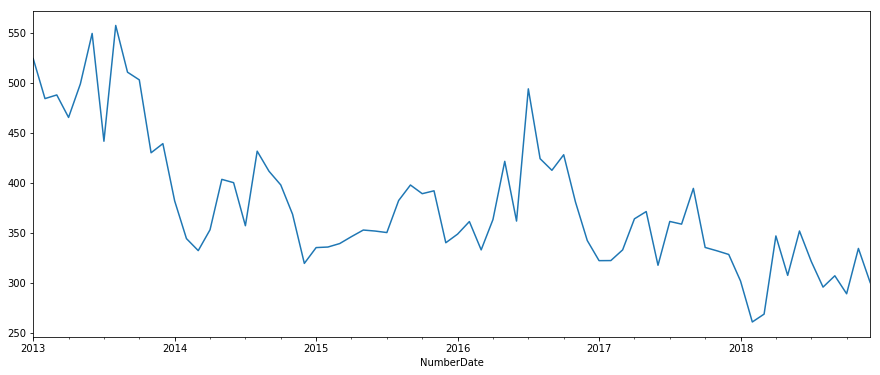

In [211]:
y.plot(figsize=(15, 6))
plt.show()

In [213]:
g=data.groupby(['Donor_Weight']).mean()
N_R = data.groupby('NumberDate')[g]
N_R = N_R.set_index('NumberDate')
N_R.index
l = N_R['Donor_Age '].resample('MS').mean()
l.plot(figsize=(15, 6))
plt.show()

KeyError: 'Column not found: <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f18cc88f358>'

In [ ]:
N_R1 = data.groupby('NumberDate')['Donor_Pulse'].reset_index()
N_R1 = N_R1.set_index('NumberDate')
N_R1.index
k = N_R1['Donor_Pulse'].resample('MS').mean()
k.plot(figsize=(15, 6))
plt.show()
Donor_Pulse

In [180]:
import itertools


In [55]:
#finding start and end date

data['NumberDate'].min(),data['NumberDate'].max(),

(Timestamp('2013-01-07 00:00:00'), Timestamp('2018-12-06 00:00:00'))

In [109]:
Train = data.ix['2013-01-07':'2017-06-27']
cross_valid = data.ix['2017-06-28':'2018-12-06']

/home/ahmii/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/ahmii/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


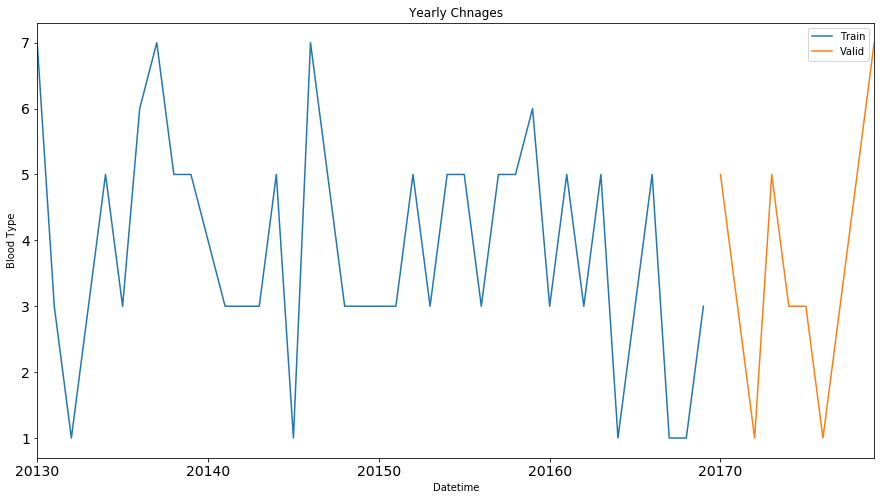

In [110]:
Train.Blood_Group_Code.plot(figsize = (15,8), title = 'Yearly Chnages', fontsize = 14, label = 'Train')
cross_valid.Blood_Group_Code.plot(figsize = (15,8), title = 'Yearly Chnages', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Blood Type')
plt.legend(loc = 'best')

In [118]:
Train.dropna(inplace=True)
corss_valid.dropna(inplace=True)

/home/ahmii/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ahmii/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Naive_Forecasting_Apporch')

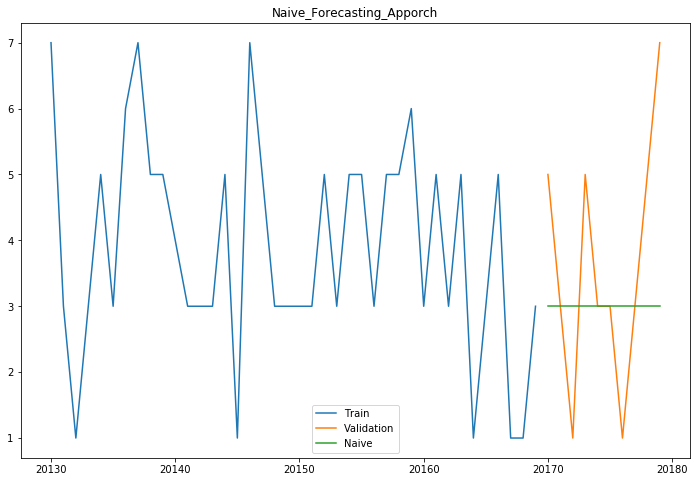

In [119]:
dd = np.asarray(Train.Blood_Group_Code)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Blood_Group_Code'],label = 'Train')
plt.plot(valid.index, valid['Blood_Group_Code'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive_Forecasting_Apporch')